In [20]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

get relax score

In [20]:
# wt test calculate relax score
scores = []
with open("alphafold_res/BMRB51377/af_wt.sc", "r") as f:
    for count, line in enumerate(f.readlines()):
        if (count != 0) and (count != 1):
            line = line.strip("\n")
            line = line.split()
            scores.append(float(line[1]))

print(scores)
print(len(scores))

[-197.961, -196.539, -199.556, -198.304, -196.93, -197.256, -197.658, -197.873, -197.553, -197.83, -192.098, -191.834, -193.075, -188.998, -194.856, -193.839, -191.166, -192.098, -190.856, -196.229, -194.712, -197.911, -191.315, -188.453, -193.068, -183.273, -184.922, -188.721, -182.763, -186.831, -192.973, -193.396, -194.875, -195.587, -196.088, -198.08, -192.292, -194.712, -193.804, -194.32, -195.023, -192.318, -193.216, -193.293, -191.986, -192.751, -192.263, -194.95, -192.754, -196.994]
50


In [24]:
format(sum(sorted(scores)[:3])/3, ".3f")

'-198.647'

In [6]:
def get_relaxScore(sc_file):
    scores = []
    with open(sc_file, "r") as f:
        for count, line in enumerate(f.readlines()):
            if (count != 0) and (count != 1):
                line = line.strip("\n")
                line = line.split()
                scores.append(float(line[1]))

    score = format(sum(sorted(scores)[:3])/3, ".3f")
    return float(score)

In [7]:
# test get_relaxScore function
get_relaxScore("alphafold_res/BMRB51377/af_wt.sc")

float

get average plddt

In [37]:
# wt calculate plddt average
af_ranking = json.load(open("alphafold_res/BMRB51377/ranking_debug.json"))
format(sum(af_ranking['plddts'].values()) / len(af_ranking['plddts'].values()), '.3f')

'86.854'

In [8]:
def get_plddt(af_ranking_file):
    af_ranking = json.load(open(af_ranking_file))
    ave_plddt = format(sum(af_ranking['plddts'].values()) / len(af_ranking['plddts'].values()), '.3f')
    return float(ave_plddt)

In [9]:
# test get_plddt function
get_plddt("alphafold_res/BMRB51377/ranking_debug.json")

float

collect plddts and relaxScore

In [12]:
# collect plddts and relaxScore

# initialize the dataframe
scores_df = pd.DataFrame(data = [['wt', 86.854, -198.647, 0]],
                         columns = ['seq', 'plddt', 'relaxScore', 'DDG'])

# set directory
directory = "alphafold_res"

# collect information and append to the dataframe
for folder in os.listdir(directory):
    if folder.startswith('del'):
        current_path = os.path.join(directory, folder)
        af_ranking_path = os.path.join(current_path, "ranking_debug.json")
        relaxScore_filename = 'af_' + folder + '.sc'
        relaxScore_path = os.path.join(current_path, relaxScore_filename)
        plddt = get_plddt(af_ranking_path)
        relaxScore = get_relaxScore(relaxScore_path)
        DDG = float(format(72*relaxScore/71 - (-198.647), "3.3f"))
        scores_df.loc[len(scores_df)] = [folder, plddt, relaxScore, DDG]

In [25]:
scores_df

,seq,plddt,relaxScore,DDG
0,wt,86.854,-198.647,0.000
1,del51,86.915,-204.047,-8.274
2,del63,89.952,-212.879,-17.230
3,del13,82.318,-193.934,1.982
4,del50,87.306,-209.334,-13.635
...,...,...,...,...
62,del12,81.020,-197.953,-2.094
63,del71,87.347,-199.058,-3.215
64,del61,88.391,-196.705,-0.828
65,del72,87.490,-206.162,-10.419


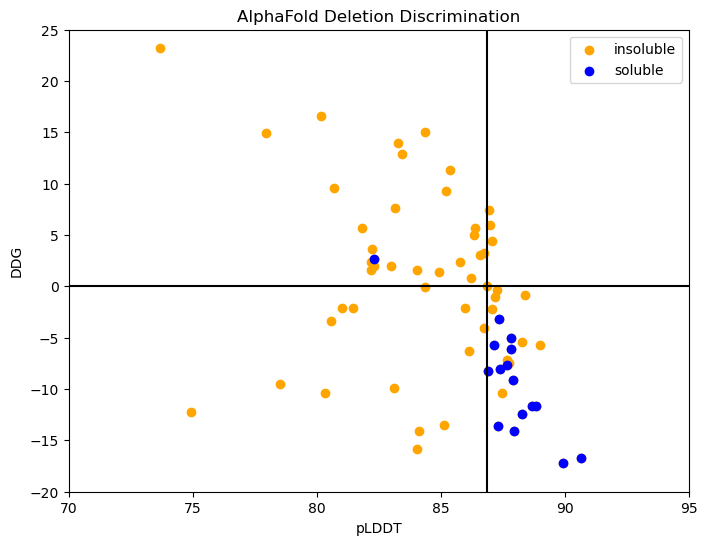

In [23]:
soluble_seqs = ['del2', 'del3', 'del5', 'del50', 'del51', 'del52',
                'del59', 'del62', 'del63', 'del64', 'del66', 'del67',
                'del68', 'del69', 'del70', 'del71', 'del71']

plt.figure(figsize = (8, 6))
plt.scatter(scores_df['plddt'], scores_df['DDG'], color = 'orange', label = 'insoluble')
soluble = scores_df[scores_df['seq'].isin(soluble_seqs)]
plt.scatter(soluble['plddt'], soluble['DDG'], color = 'blue', label = 'soluble')

plt.xlim(70, 95)
plt.ylim(-20, 25)

plt.axhline(y = 0, color = 'black')
plt.axvline(x = 86.854, color = 'black')

plt.xlabel('pLDDT')
plt.ylabel('DDG')
plt.title('AlphaFold Deletion Discrimination')
plt.legend()

plt.show()

To clarify, here the point at original is actually the wildtype, I forgot to delete this point, which is actually soluble but showed insoluble in the figure.

In [45]:
# for figure 3d, DDG vs deltaTM
soluble_df = pd.DataFrame(data = [['del2', 59.2, 61.3, -6.096, '2'],
                                  ['del3', 58.5, 61.9, -7.637, '3'],
                                  ['del5', 58.5, 59.6, -11.62, '5'],
                                  ['del50', 55.5, 56.6, -13.635, '50'],
                                  ['del51', 58.1, 60.6, -8.274, '51'],
                                  ['del52', 62.2, 56.0, -5.721, '52'],
                                  ['del59', 59.2, 59.5, 2.657, '59'],
                                  ['del62', 58.7, 60.5, -16.695, '62'],
                                  ['del63', 56.1, 54.2, -17.23, '63'],
                                  ['del64', 58.8, 60.4, -12.474, '64'],
                                  ['del66', 58.7, 59.3, -8.008, '66'],
                                  ['del67', 61.4, 61.4, -11.61, '67'],
                                  ['del68', 57.2, 57.8, -14.069, '68'],
                                  ['del69', 57.8, 58.8, -9.156, '69'],
                                  ['del70', 58.7, 60.4, -5.008, '70'],
                                  ['del71', 57.7, 59.2, -3.215, '71'],
                                  ['del72', 58.7, 59.3, -10.419, '72']],
                          columns = ['seq', 'average_TM_CD', 'average_TM_nanoDSF', 'DDG', 'label'])

soluble_df['delta_TM_CD'] = soluble_df['average_TM_CD'] - 58.9
soluble_df['delta_TM_nanoDSF'] = soluble_df['average_TM_nanoDSF'] - 60.2

In [50]:
type(soluble_df['label'])

pandas.core.series.Series

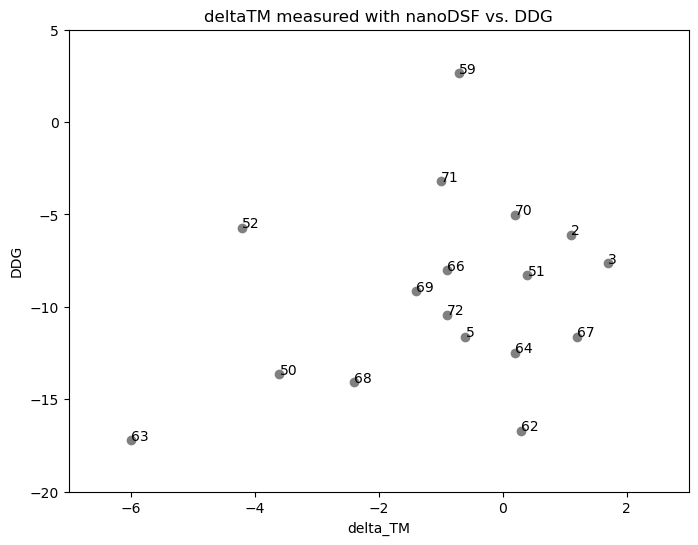

In [52]:
plt.figure(figsize = (8, 6))
plt.scatter(soluble_df['delta_TM_nanoDSF'], soluble_df['DDG'], color = 'gray')

for index, row in soluble_df.iterrows():
    plt.text(row['delta_TM_nanoDSF'], row['DDG'], row['label'], color = 'black')

plt.xlim(-7, 3)
plt.ylim(-20, 5)

plt.xlabel('delta_TM')
plt.ylabel('DDG')
plt.title('deltaTM measured with nanoDSF vs. DDG')

plt.show()